# Stock Market Forecasting

In [1]:
import pandas as pd
import yfinance as yf

In [2]:
from datetime import datetime, timedelta
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [3]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
google_data.to_csv("Google.csv")

In [5]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-09-20,2.912832,3.028648,2.908349,2.972857,2.965574,213585582
2004-09-21,2.984065,2.999258,2.926780,2.934999,2.927809,145262446
2004-09-22,2.924040,2.980578,2.909345,2.948448,2.941225,152344894
2004-09-23,2.959906,3.054302,2.914575,3.009221,3.001849,171524515
2004-09-24,3.012209,3.090914,2.982820,2.984563,2.977252,183336625


In [6]:
google_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-16,158.330002,159.240005,157.610001,158.990005,158.990005,14157600
2024-09-17,160.089996,161.589996,159.410004,160.279999,160.279999,12064800
2024-09-18,160.850006,161.630005,159.660004,160.809998,160.809998,16756500
2024-09-19,164.820007,164.990005,162.522003,163.240005,163.240005,17529000
2024-09-20,164.429993,164.710007,163.740005,164.059998,164.059998,4129985


In [7]:
google_data.shape

(5036, 6)

In [8]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5036.000000,5036.000000,5036.000000,5036.000000,5036.000000,5.036000e+03
mean,46.293309,46.781192,45.830146,46.313154,46.202895,1.145802e+08
std,44.333870,44.822383,43.897908,44.362845,44.263137,1.491817e+08
min,2.912832,2.980578,2.908349,2.934999,2.927809,1.584340e+05
25%,13.114033,13.245976,12.980098,13.120696,13.088553,2.706000e+07
50%,27.343706,27.530416,27.043252,27.295311,27.228442,5.367819e+07
75%,61.250000,61.744075,60.577127,61.087626,60.937975,1.405037e+08
max,191.750000,193.309998,190.619995,192.660004,192.406723,1.650833e+09


In [9]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5036 entries, 2004-09-20 to 2024-09-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5036 non-null   float64
 1   High       5036 non-null   float64
 2   Low        5036 non-null   float64
 3   Close      5036 non-null   float64
 4   Adj Close  5036 non-null   float64
 5   Volume     5036 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.4 KB


In [10]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

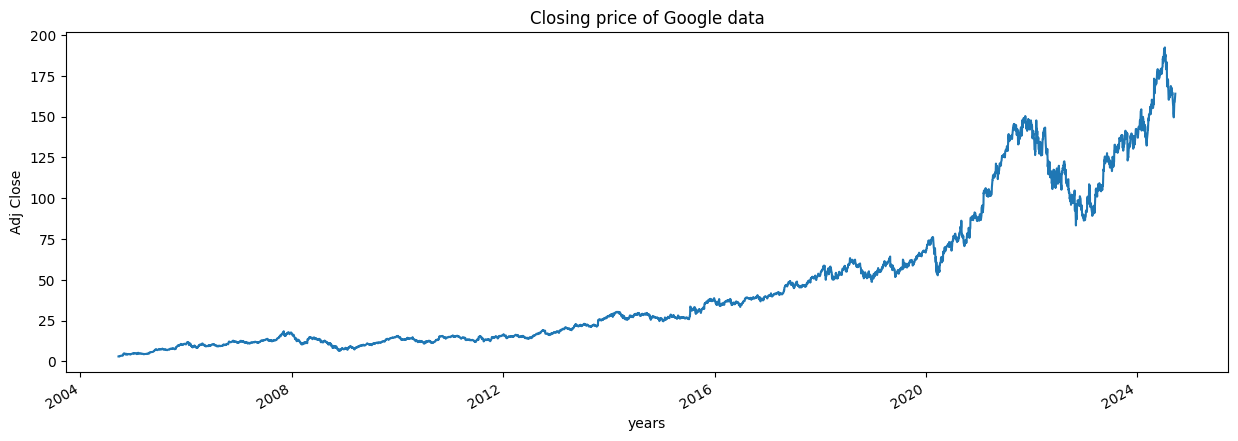

In [12]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [13]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [14]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

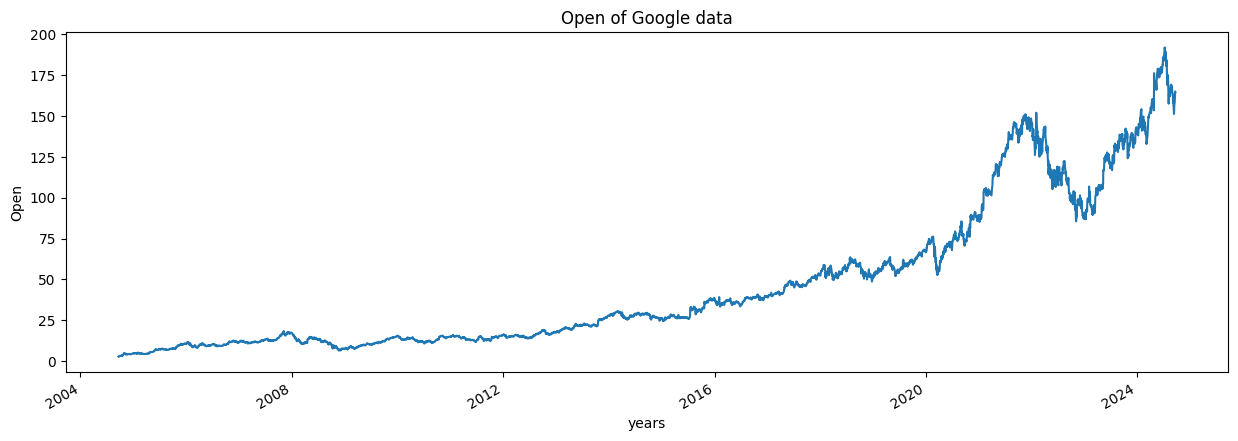

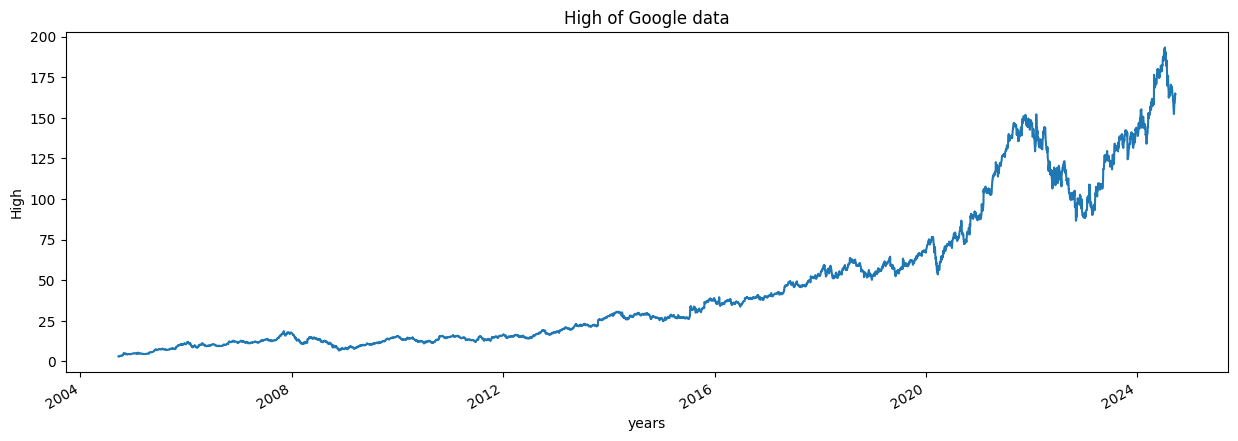

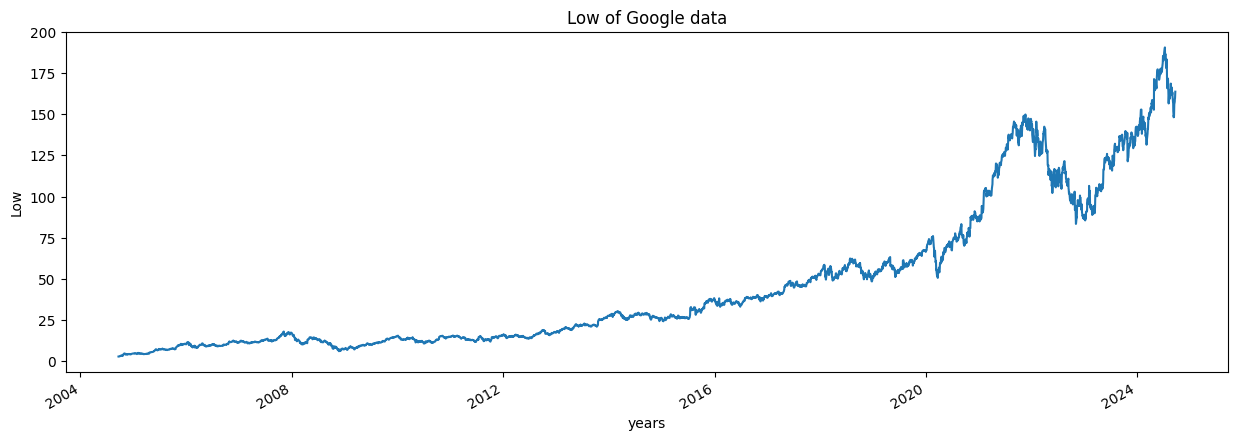

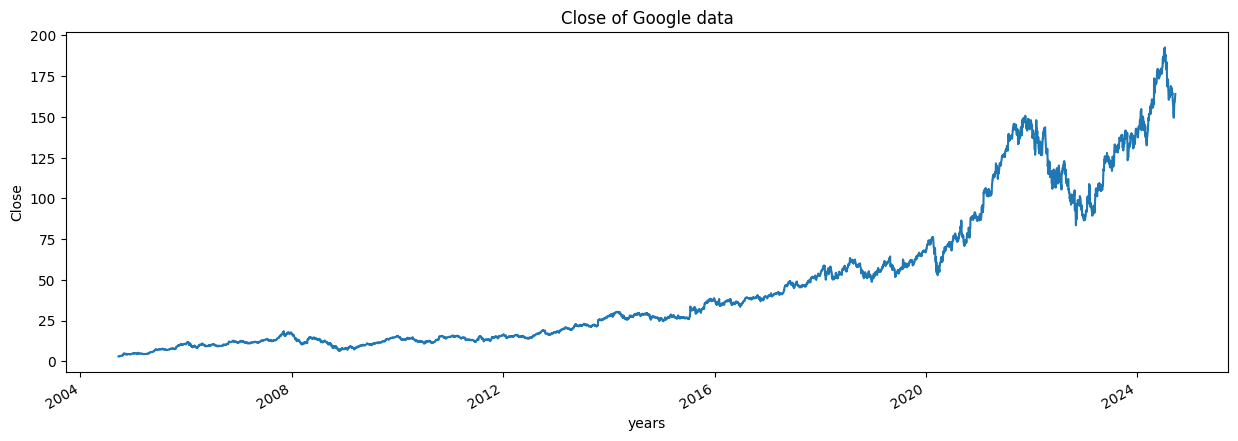

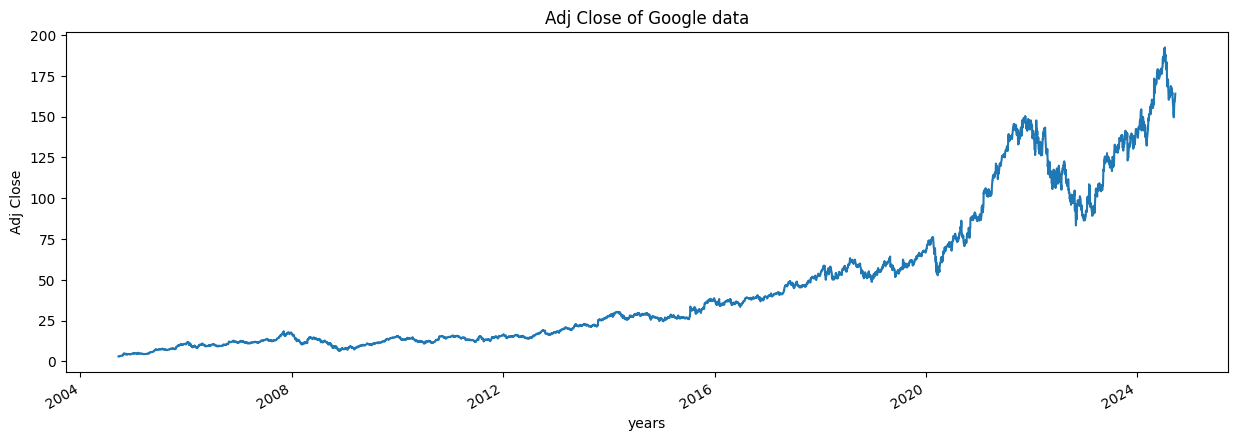

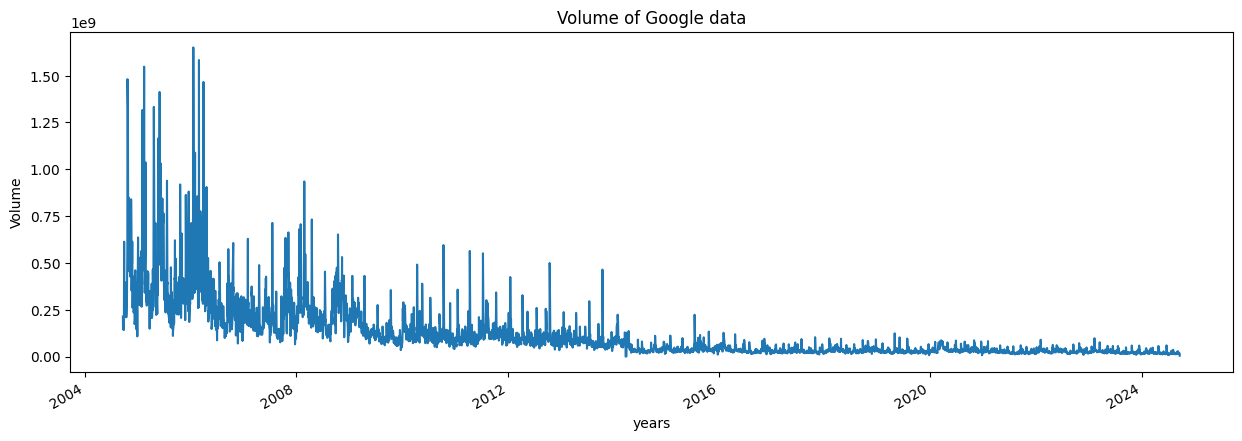

In [15]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [16]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [17]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [18]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [19]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [20]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 73
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 182


In [21]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [22]:
google_data['MA_for_250_days'][2346:2596].tail()

Date
2015-01-05    27.906959
2015-01-06    27.893413
2015-01-07    27.880787
2015-01-08    27.868482
2015-01-09    27.855598
Name: MA_for_250_days, dtype: float64

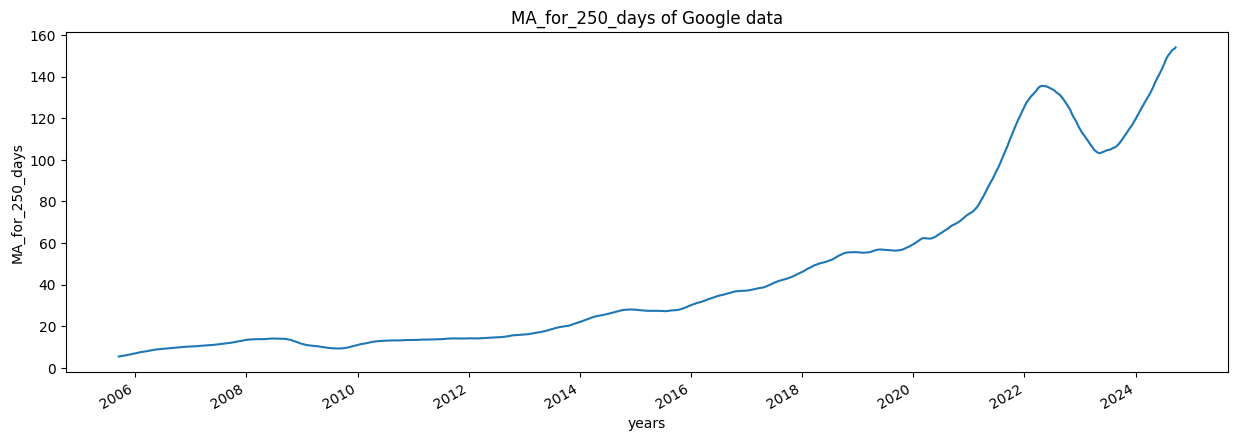

In [23]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

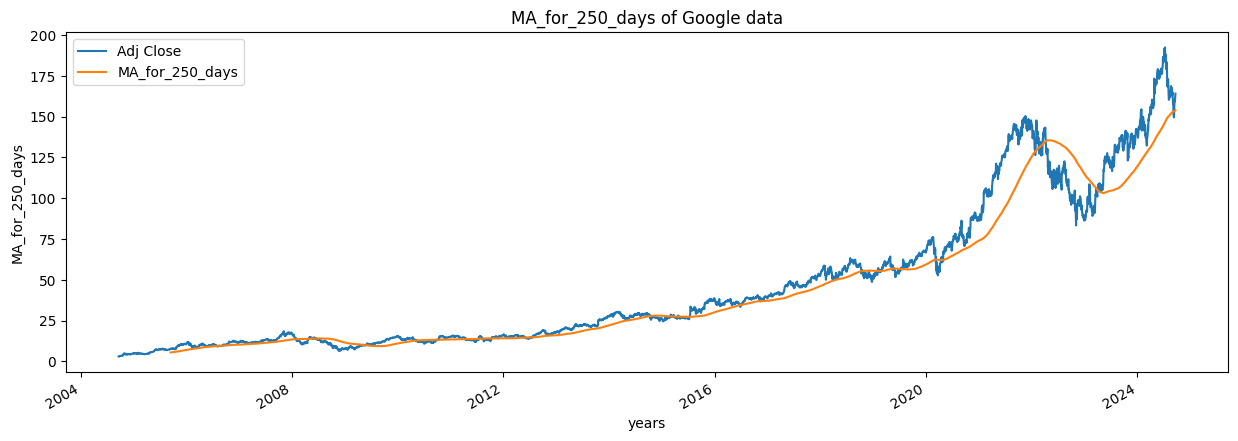

In [24]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

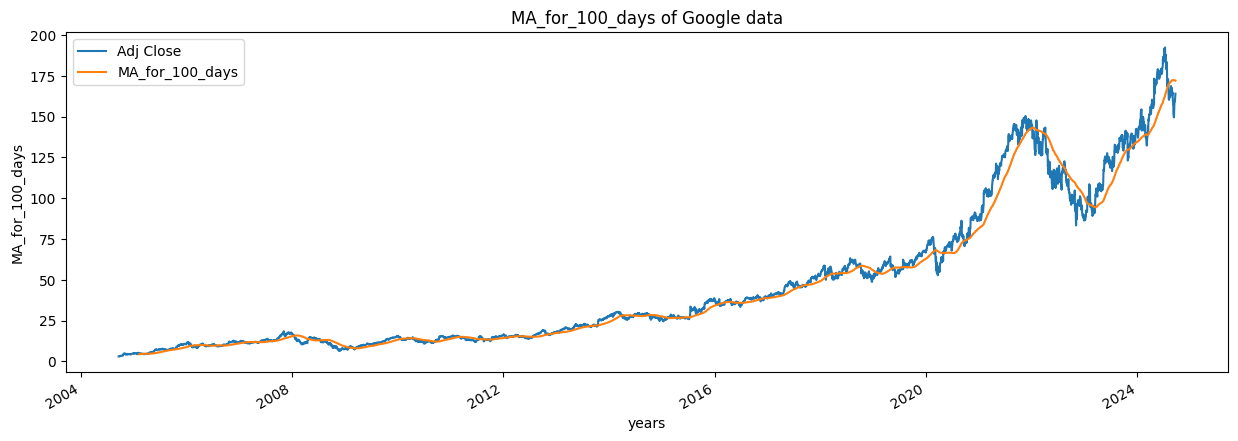

In [25]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

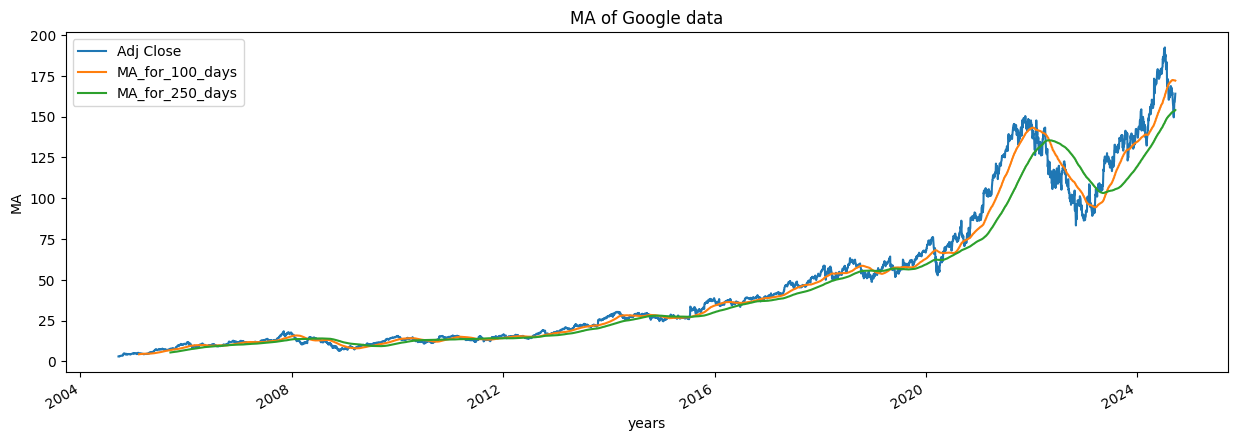

In [26]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [27]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-09-20,2.965574,NaN
2004-09-21,2.927809,-0.012735
2004-09-22,2.941225,0.004582
2004-09-23,3.001849,0.020612
2004-09-24,2.977252,-0.008194


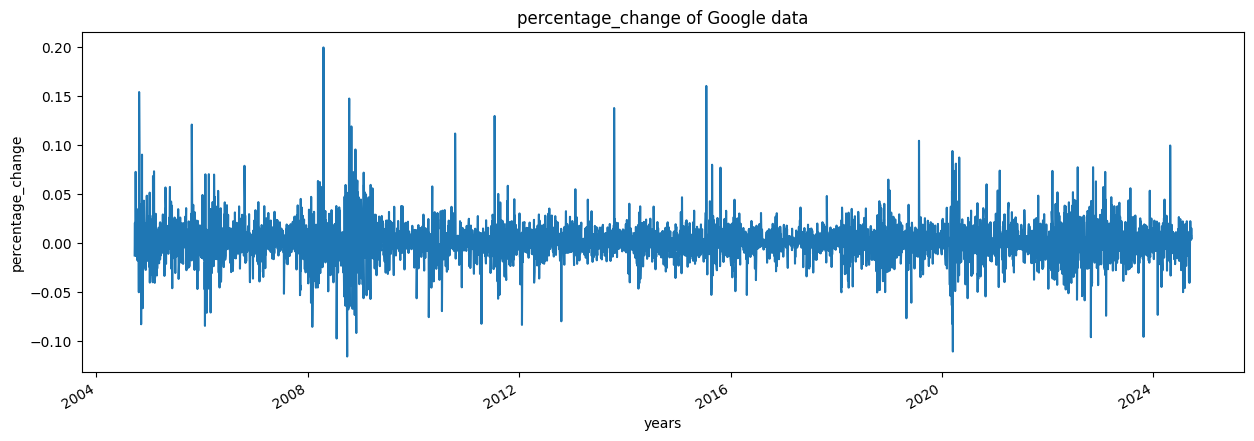

In [28]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [29]:
Adj_close_price = google_data[['Adj Close']]

In [30]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([192.40672302]), array([2.92780876]))

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[1.99311172e-04],
       [0.00000000e+00],
       [7.08049860e-05],
       ...,
       [8.33244107e-01],
       [8.46068795e-01],
       [8.50396412e-01]])

In [32]:
len(scaled_data)

5036

In [33]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [34]:
x_data[0],y_data[0]

(array([[1.99311172e-04],
        [0.00000000e+00],
        [7.08049860e-05],
        [3.90758060e-04],
        [2.60940740e-04],
        [5.50751584e-05],
        [1.18275696e-03],
        [1.73611067e-03],
        [1.54204278e-03],
        [1.93279958e-03],
        [2.25798964e-03],
        [2.69201762e-03],
        [2.52286629e-03],
        [2.75495706e-03],
        [2.60809752e-03],
        [2.28421734e-03],
        [2.56482760e-03],
        [3.02376586e-03],
        [3.16800439e-03],
        [3.44467999e-03],
        [4.10686786e-03],
        [3.94689573e-03],
        [2.97000435e-03],
        [4.13571406e-03],
        [7.15817508e-03],
        [9.12112821e-03],
        [8.38682297e-03],
        [8.93362102e-03],
        [9.89477502e-03],
        [9.54597826e-03],
        [1.02527447e-02],
        [1.01006431e-02],
        [9.68103508e-03],
        [8.76708944e-03],
        [6.75430065e-03],
        [7.17390365e-03],
        [6.66907445e-03],
        [6.55892665e-03],
        [8.5

In [35]:

int(len(x_data)*0.7)

3455

In [36]:
4908-100-int(len(x_data)*0.7)

1353

In [37]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [38]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3455, 100, 1)
(3455, 1)
(1481, 100, 1)
(1481, 1)


In [39]:
print(x_train[5], y_train)

[[5.50751584e-05]
 [1.18275696e-03]
 [1.73611067e-03]
 [1.54204278e-03]
 [1.93279958e-03]
 [2.25798964e-03]
 [2.69201762e-03]
 [2.52286629e-03]
 [2.75495706e-03]
 [2.60809752e-03]
 [2.28421734e-03]
 [2.56482760e-03]
 [3.02376586e-03]
 [3.16800439e-03]
 [3.44467999e-03]
 [4.10686786e-03]
 [3.94689573e-03]
 [2.97000435e-03]
 [4.13571406e-03]
 [7.15817508e-03]
 [9.12112821e-03]
 [8.38682297e-03]
 [8.93362102e-03]
 [9.89477502e-03]
 [9.54597826e-03]
 [1.02527447e-02]
 [1.01006431e-02]
 [9.68103508e-03]
 [8.76708944e-03]
 [6.75430065e-03]
 [7.17390365e-03]
 [6.66907445e-03]
 [6.55892665e-03]
 [8.54679888e-03]
 [8.41304816e-03]
 [8.78938123e-03]
 [7.17259503e-03]
 [7.16734798e-03]
 [6.51696786e-03]
 [6.76085884e-03]
 [6.19701857e-03]
 [6.51434308e-03]
 [7.46369436e-03]
 [8.07080959e-03]
 [8.28848040e-03]
 [8.41042840e-03]
 [8.14555678e-03]
 [8.07212324e-03]
 [8.20324666e-03]
 [7.66431541e-03]
 [7.02704663e-03]
 [6.83691213e-03]
 [7.28929850e-03]
 [7.05589408e-03]
 [6.89854044e-03]
 [7.979022

In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [41]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\91702\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [43]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3455/3455 ━━━━━━━━━━━━━━━━━━━━ 137s 39ms/step - loss: 4.1567e-04
Epoch 2/2
3455/3455 ━━━━━━━━━━━━━━━━━━━━ 132s 38ms/step - loss: 5.5708e-05


In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [45]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


In [46]:
predictions

array([[0.27530348],
       [0.2775992 ],
       [0.28016576],
       ...,
       [0.8395678 ],
       [0.84381855],
       [0.8499573 ]], dtype=float32)

In [47]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 55.092014],
       [ 55.527004],
       [ 56.013313],
       ...,
       [162.00821 ],
       [162.81363 ],
       [163.97679 ]], dtype=float32)

In [48]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 53.70660782],
       [ 53.36893845],
       [ 52.75993347],
       ...,
       [160.80999756],
       [163.24000549],
       [164.05999756]])

In [49]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [50]:
rmse

4.425471933699103

In [51]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-10-31,53.706608,55.092014
2018-11-01,53.368938,55.527004
2018-11-02,52.759933,56.013313
2018-11-05,51.877098,56.116943
2018-11-06,52.661175,55.732086


<Figure size 640x480 with 0 Axes>

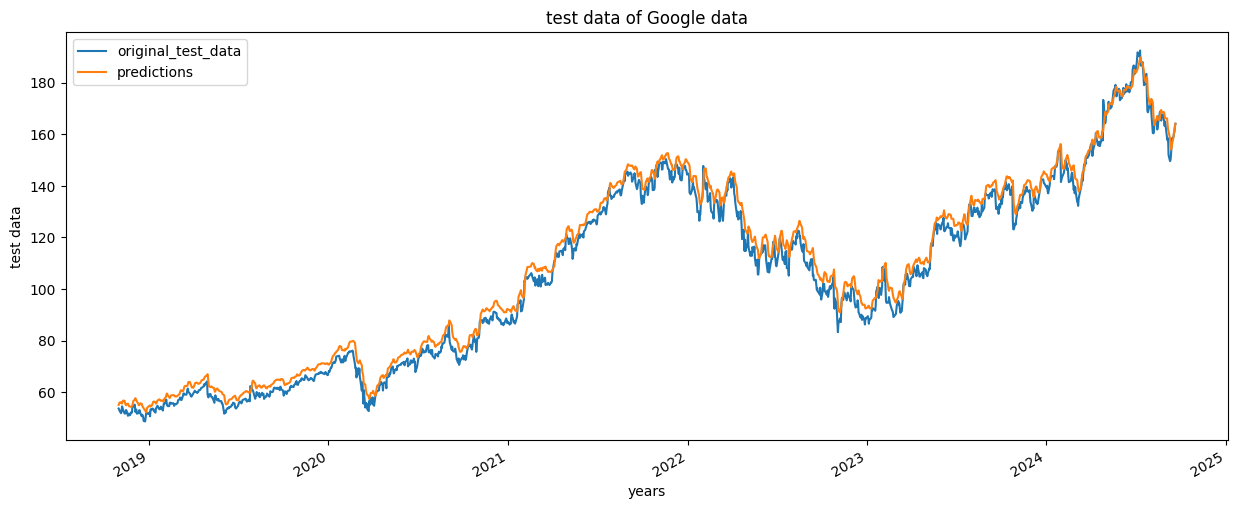

In [52]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

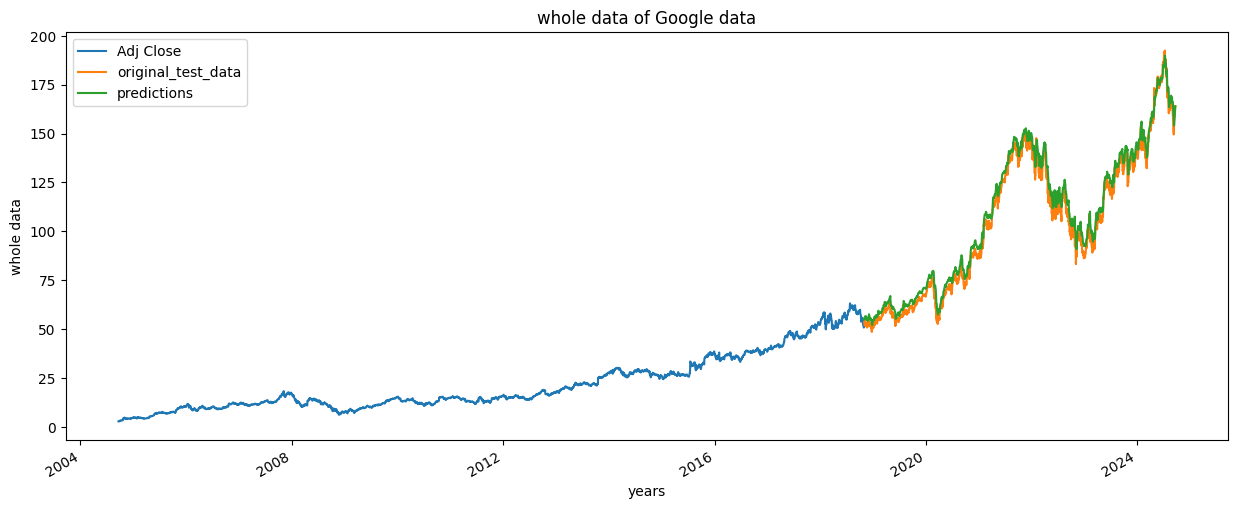

In [53]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [68]:
last_730_days = scaled_data[-730:]

# Reshape last 60 days for input to the model
last_730_days = np.reshape(last_730_days, (1, last_730_days.shape[0], 1))

# Forecasting function for the next 30 days
def predict_next_30_days(model, last_730_days, days=30):
    pred_list = []
    input_sequence = last_730_days
    for _ in range(days):
        # Predict the next day
        next_pred = model.predict(input_sequence, verbose=0)
        pred_list.append(next_pred[0][0])
        
        # Append the predicted value to the sequence and remove the oldest value
        input_sequence = np.append(input_sequence[:, 1:, :], [[next_pred[0]]], axis=1)
        
    return pred_list

next_30_days_scaled = predict_next_30_days(model, last_730_days)

# Inverse transform to get the actual prices
next_30_days = scaler.inverse_transform(np.array(next_30_days_scaled).reshape(-1, 1))

In [69]:
start_date = datetime.now()
date_range = pd.date_range(start=start_date, periods=30, freq='B').date  # Convert to just date

# Ensure the length of the forecast prices matches the length of the date range
if len(date_range) != len(next_30_days):
    raise ValueError("Length of forecast prices must match the number of business days.")

# Create the DataFrame
df = pd.DataFrame(data=next_30_days, index=date_range, columns=['forecast_price'])

# Display the DataFrame
print(df)

            forecast_price
2024-09-20      164.976837
2024-09-23      165.846573
2024-09-24      166.628082
2024-09-25      167.344025
2024-09-26      168.010834
2024-09-27      168.639954
2024-09-30      169.239075
2024-10-01      169.812897
2024-10-02      170.364136
2024-10-03      170.894089
2024-10-04      171.403244
2024-10-07      171.891785
2024-10-08      172.359650
2024-10-09      172.806900
2024-10-10      173.233673
2024-10-11      173.640305
2024-10-14      174.027313
2024-10-15      174.395218
2024-10-16      174.744781
2024-10-17      175.076691
2024-10-18      175.391724
2024-10-21      175.690659
2024-10-22      175.974274
2024-10-23      176.243271
2024-10-24      176.498428
2024-10-25      176.740356
2024-10-28      176.969757
2024-10-29      177.187210
2024-10-30      177.393341
2024-10-31      177.588669


<Figure size 640x480 with 0 Axes>

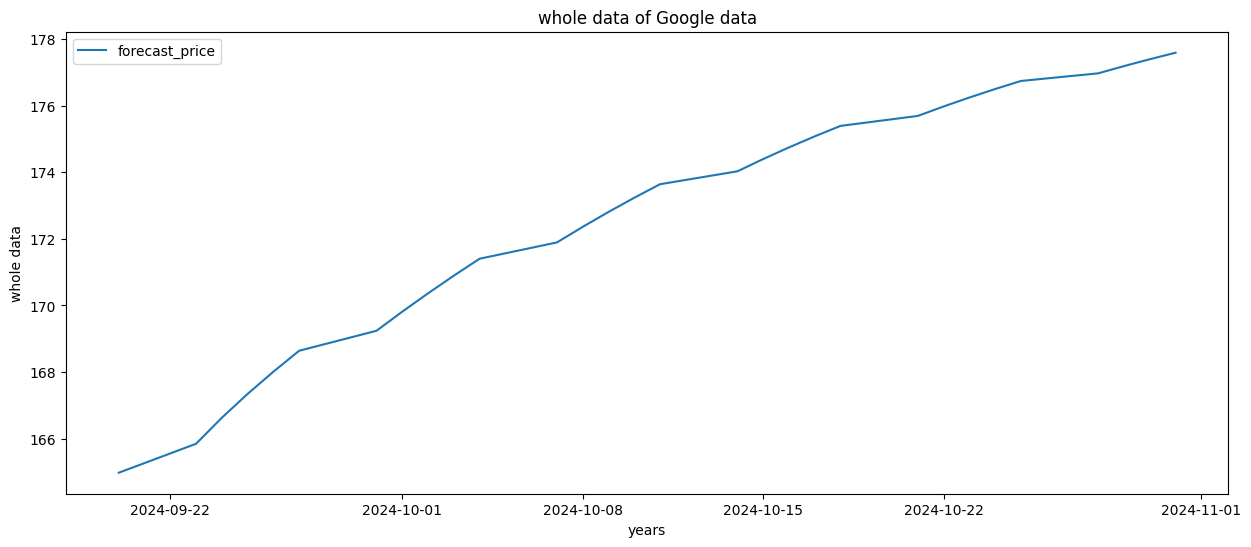

In [70]:
plot_graph((15,6), df, 'whole data')

In [71]:
df_filtered = google_data.loc[google_data.index >= '2024-01-01', ['Adj Close']]
print(df_filtered)


             Adj Close
Date                  
2024-01-02  139.218109
2024-01-03  140.016144
2024-01-04  137.701828
2024-01-05  137.053421
2024-01-08  140.185730
...                ...
2024-09-16  158.990005
2024-09-17  160.279999
2024-09-18  160.809998
2024-09-19  163.240005
2024-09-20  164.059998

[182 rows x 1 columns]


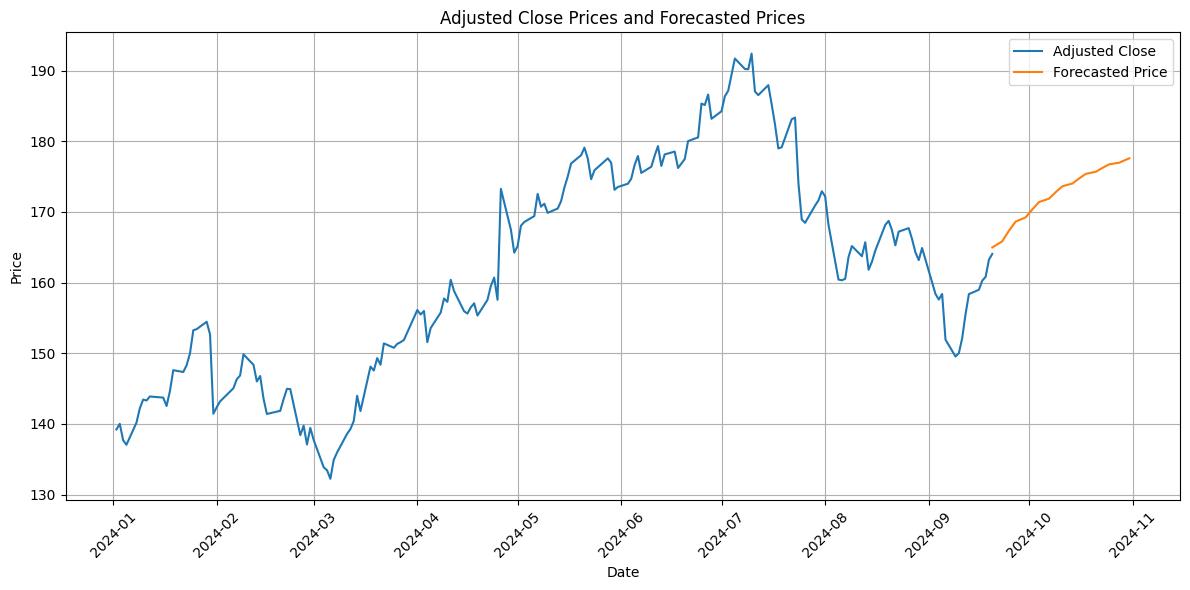

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['Adj Close'], label='Adjusted Close')
plt.plot(df.index, df['forecast_price'], label='Forecasted Price')
plt.title('Adjusted Close Prices and Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [67]:
model.save("Latest_stock_price_model.keras")